In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import ensemble
from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances

import os, sys
from collections import Counter
import numpy as np
import numpy.random as rd
import pandas as pd
import scipy as sp
from scipy import stats as st
pd.options.display.max_rows = 999

from sklearn.covariance import GraphicalLasso
from sklearn.preprocessing import StandardScaler
#from sklearn.covariance import GraphLasso

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import font_manager
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)
%matplotlib inline

d:\users\izumu\documents\datascience1\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


データ取得

In [2]:
sns.set()
dataset = datasets.load_iris()

In [3]:
X = dataset.data
label = ["sepal length", "sepal width", "petal length", "petal width"]
P = X.shape[1]
y = dataset.target
y_name = dataset.target_names

[graphical_lasso] Iteration   0, cost  inf, dual gap -1.215e+01
[graphical_lasso] Iteration   1, cost  2.08e+01, dual gap 4.645e-02
[graphical_lasso] Iteration   2, cost  2.08e+01, dual gap 3.663e-03
[graphical_lasso] Iteration   3, cost  2.08e+01, dual gap 1.539e-02
[graphical_lasso] Iteration   4, cost  2.08e+01, dual gap 1.616e-02
[graphical_lasso] Iteration   5, cost  2.08e+01, dual gap 1.460e-02
[graphical_lasso] Iteration   6, cost  2.08e+01, dual gap 1.356e-02
[graphical_lasso] Iteration   7, cost  2.08e+01, dual gap 1.233e-02
[graphical_lasso] Iteration   8, cost  2.08e+01, dual gap 1.128e-02
[graphical_lasso] Iteration   9, cost  2.08e+01, dual gap 1.016e-02
[graphical_lasso] Iteration  10, cost  2.08e+01, dual gap 9.004e-03
[graphical_lasso] Iteration  11, cost  2.08e+01, dual gap 7.825e-03
[graphical_lasso] Iteration  12, cost  2.08e+01, dual gap 6.651e-03
[graphical_lasso] Iteration  13, cost  2.08e+01, dual gap 5.508e-03
[graphical_lasso] Iteration  14, cost  2.08e+01, dua

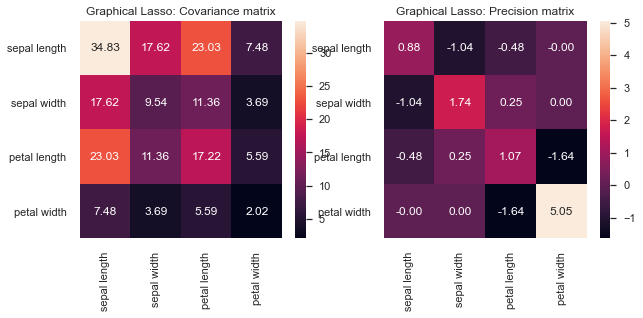

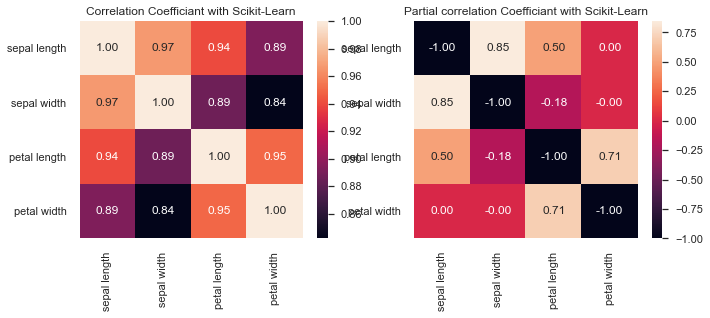

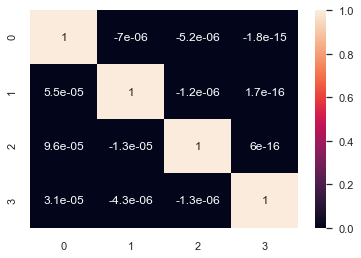

In [5]:
img_path = "img/"
if not os.path.exists(img_path):
    os.mkdir(img_path)

# parametars
alpha = 0.2 # L１正則化パラメーター

# Scikit LearnのGraphical Lassoを使ってブロック降下法で分散共分散行列、精度行列を求める
model = GraphicalLasso(alpha=alpha,
                     max_iter=100,                     
                     verbose=True,
                     assume_centered = True)

model.fit(X)
cov_ = model.covariance_ # 分散共分散行列
prec_ = model.precision_ # 精度行列

# Scikit LearnのGraphical Lassoの結果表示
plt.figure(figsize=(10,4))
ax = plt.subplot(121)
sns.heatmap(cov_, annot=cov_, fmt='0.2f', ax=ax, xticklabels=label, yticklabels=label)
plt.title("Graphical Lasso: Covariance matrix")

ax = plt.subplot(122)
sns.heatmap(prec_, annot=prec_, fmt='0.2f', ax=ax, xticklabels=label, yticklabels=label)
plt.title("Graphical Lasso: Precision matrix")
plt.savefig(img_path+"glasso_cov_prec.png", dpi=128)
plt.show()

# 相関行列の算出
cor = np.empty_like(cov_)
for i in range(P):
    for j in range(P):
        cor[i, j] = cov_[i, j]/np.sqrt(cov_[i, i]*cov_[j, j])
        
# 偏相関行列の算出
rho = np.empty_like(prec_)
for i in range(P):
    for j in range(P):
        rho[i, j] = -prec_[i, j]/np.sqrt(prec_[i, i]*prec_[j, j])
        
plt.figure(figsize=(11,4))
ax = plt.subplot(122)
sns.heatmap(pd.DataFrame(rho), annot=rho, fmt='0.2f', ax=ax, xticklabels=label, yticklabels=label)
plt.title("Partial correlation Coefficiant with Scikit-Learn")
#plt.savefig(img_path+"partial_corr_sklearn.png", dpi=128)

ax = plt.subplot(121)
sns.heatmap(pd.DataFrame(cor), annot=cor, fmt='0.2f', ax=ax, xticklabels=label, yticklabels=label)
plt.title("Correlation Coefficiant with Scikit-Learn")
plt.savefig(img_path+"corr_pcorr_sklearn.png", dpi=128)
plt.show()

# ちゃんと単位行列になっているか確認してみる。
sns.heatmap(np.dot(cov_, prec_), annot=np.dot(cov_, prec_))
plt.savefig(img_path+"glasso_inv.png", dpi=128)
